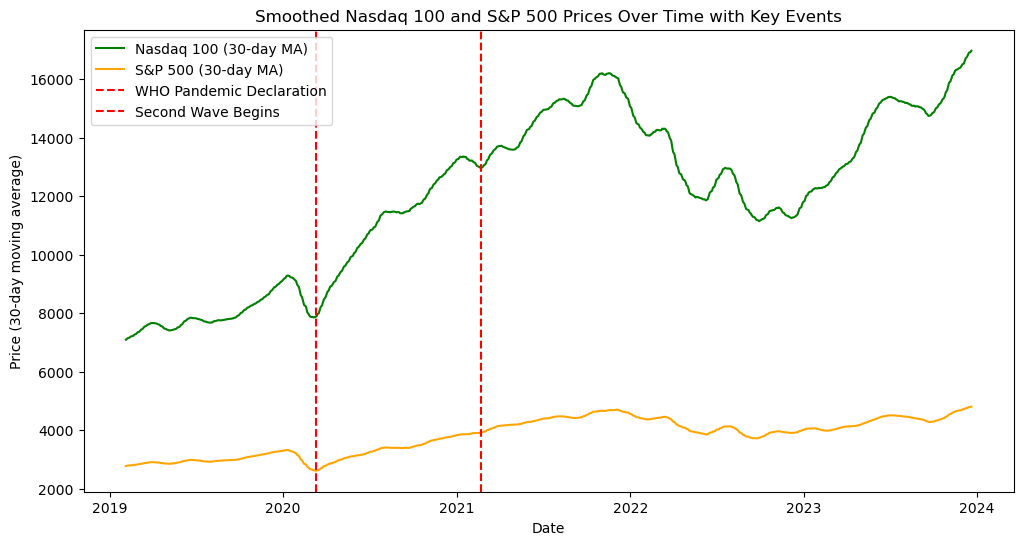

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv", parse_dates=['Date'], dayfirst=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Nasdaq_100_Price'] = data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)
data['S&P_500_Price'] = data['S&P_500_Price'].replace(',', '', regex=True).astype(float)


data['Nasdaq_100_MA'] = data['Nasdaq_100_Price'].rolling(window=30).mean()
data['S&P_500_MA'] = data['S&P_500_Price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Nasdaq_100_MA'], label='Nasdaq 100 (30-day MA)', color='green')
plt.plot(data['Date'], data['S&P_500_MA'], label='S&P 500 (30-day MA)', color='orange')

event_dates = {
    "WHO Pandemic Declaration": "2020-03-11",
    "Second Wave Begins": "2021-02-20"
}

for event, date in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=event)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Date')
plt.ylabel('Price (30-day moving average)')
plt.title('Smoothed Nasdaq 100 and S&P 500 Prices Over Time with Key Events')
plt.show()

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


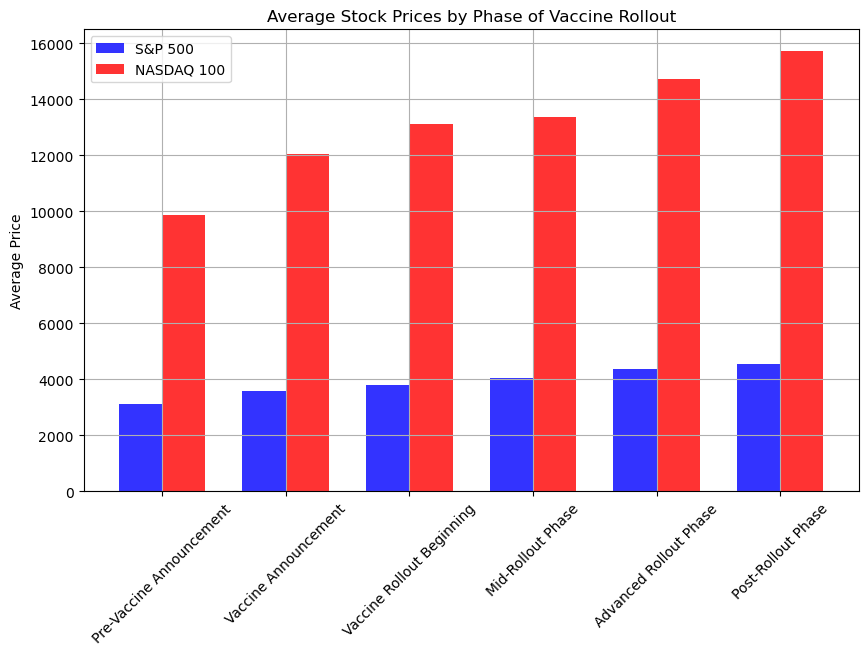

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

financial_data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv")
financial_data['Date'] = pd.to_datetime(financial_data['Date'], format='%d-%m-%Y')

financial_data['S&P_500_Price'] = financial_data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
financial_data['Nasdaq_100_Price'] = financial_data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)

phases = {
    'Pre-Vaccine Announcement': ('01-01-2020', '01-11-2020'),
    'Vaccine Announcement': ('02-11-2020', '13-12-2020'),
    'Vaccine Rollout Beginning': ('14-12-2020', '01-03-2021'),
    'Mid-Rollout Phase': ('02-03-2021', '01-06-2021'),
    'Advanced Rollout Phase': ('02-06-2021', '01-09-2021'),
    'Post-Rollout Phase': ('02-09-2021', '01-01-2022')
}

phase_data = {}
for phase, (start, end) in phases.items():
    start_date = pd.to_datetime(start, format='%d-%m-%Y')
    end_date = pd.to_datetime(end, format='%d-%m-%Y')
    mask = (financial_data['Date'] >= start_date) & (financial_data['Date'] <= end_date)
    filtered_data = financial_data[mask]
    average_prices = filtered_data[['S&P_500_Price', 'Nasdaq_100_Price']].mean()
    phase_data[phase] = average_prices

fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(phases))
bar_width = 0.35
opacity = 0.8

sp500_prices = [data['S&P_500_Price'] for data in phase_data.values()]
nasdaq_prices = [data['Nasdaq_100_Price'] for data in phase_data.values()]

rects1 = ax.bar(index, sp500_prices, bar_width, alpha=opacity, color='b', label='S&P 500')
rects2 = ax.bar([i + bar_width for i in index], nasdaq_prices, bar_width, alpha=opacity, color='r', label='NASDAQ 100')

ax.set_ylabel('Average Price')
ax.set_title('Average Stock Prices by Phase of Vaccine Rollout')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(list(phases.keys()), rotation=45)
ax.legend()

plt.grid(True)
plt.show()

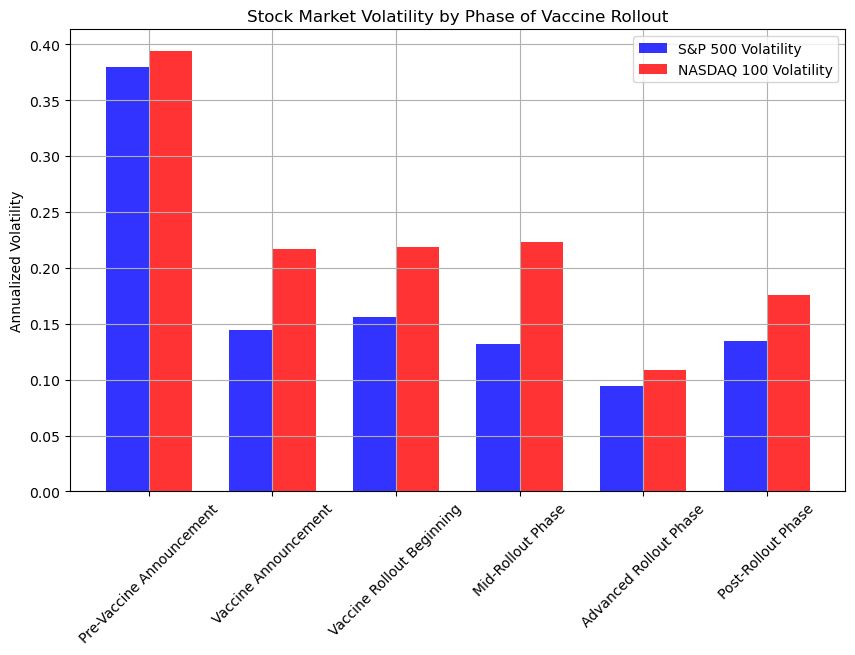

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

financial_data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv")
financial_data['Date'] = pd.to_datetime(financial_data['Date'], format='%d-%m-%Y')

financial_data['S&P_500_Price'] = financial_data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
financial_data['Nasdaq_100_Price'] = financial_data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)

phases = {
    'Pre-Vaccine Announcement': ('01-01-2020', '01-11-2020'),
    'Vaccine Announcement': ('02-11-2020', '13-12-2020'),
    'Vaccine Rollout Beginning': ('14-12-2020', '01-03-2021'),
    'Mid-Rollout Phase': ('02-03-2021', '01-06-2021'),
    'Advanced Rollout Phase': ('02-06-2021', '01-09-2021'),
    'Post-Rollout Phase': ('02-09-2021', '01-01-2022')
}

financial_data['S&P_500_Returns'] = financial_data['S&P_500_Price'].pct_change()
financial_data['Nasdaq_100_Returns'] = financial_data['Nasdaq_100_Price'].pct_change()

volatility_data = {}
for phase, (start, end) in phases.items():
    start_date = pd.to_datetime(start, format='%d-%m-%Y')
    end_date = pd.to_datetime(end, format='%d-%m-%Y')
    mask = (financial_data['Date'] >= start_date) & (financial_data['Date'] <= end_date)
    filtered_data = financial_data[mask]
    volatility = filtered_data[['S&P_500_Returns', 'Nasdaq_100_Returns']].std() * (252**0.5)  
    volatility_data[phase] = volatility

fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(phases))
bar_width = 0.35
opacity = 0.8

sp500_vol = [data['S&P_500_Returns'] for data in volatility_data.values()]
nasdaq_vol = [data['Nasdaq_100_Returns'] for data in volatility_data.values()]

rects1 = ax.bar(index, sp500_vol, bar_width, alpha=opacity, color='b', label='S&P 500 Volatility')
rects2 = ax.bar([i + bar_width for i in index], nasdaq_vol, bar_width, alpha=opacity, color='r', label='NASDAQ 100 Volatility')

ax.set_ylabel('Annualized Volatility')
ax.set_title('Stock Market Volatility by Phase of Vaccine Rollout')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(list(phases.keys()), rotation=45)
ax.legend()

plt.grid(True)
plt.show()

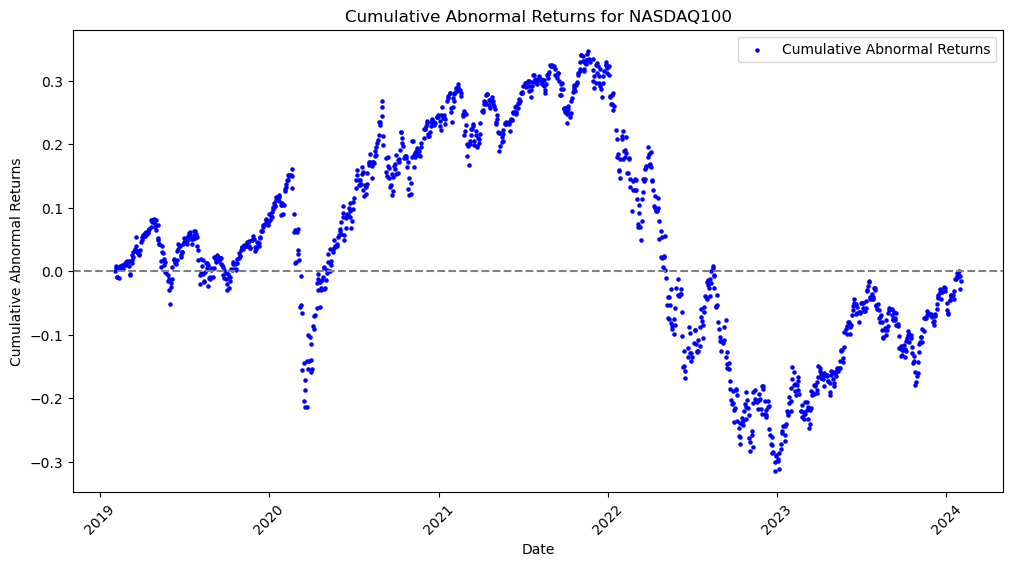

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv", parse_dates=['Date'], dayfirst=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['Nasdaq_100_Price'] = data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)
data['Nasdaq_100_Returns'] = data['Nasdaq_100_Price'].pct_change()

mean_return = data['Nasdaq_100_Returns'].mean()
data['Abnormal_Returns'] = data['Nasdaq_100_Returns'] - mean_return
data['CAR'] = data['Abnormal_Returns'].cumsum()

plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['CAR'], color='blue', label='Cumulative Abnormal Returns', s=5)  # Adjust size with 's' parameter
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Abnormal Returns')
plt.title('Cumulative Abnormal Returns for NASDAQ100')
plt.legend()
plt.xticks(rotation=45)
plt.show()


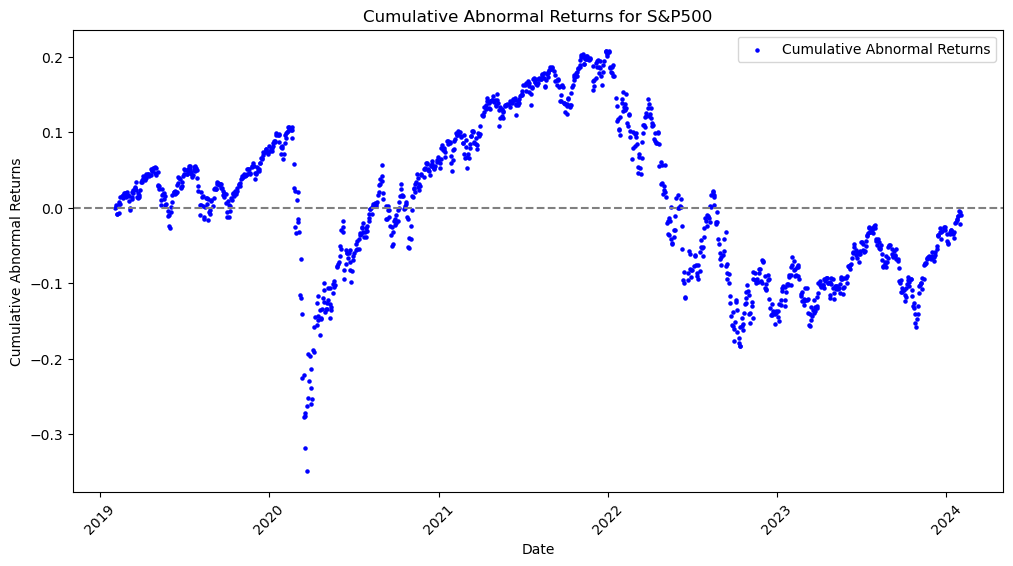

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv", parse_dates=['Date'], dayfirst=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data['S&P_500_Price'] = data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
data['S&P_500_Returns'] = data['S&P_500_Price'].pct_change()

mean_return = data['S&P_500_Returns'].mean()
data['Abnormal_Returns'] = data['S&P_500_Returns'] - mean_return
data['CAR'] = data['Abnormal_Returns'].cumsum()

plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['CAR'], color='blue', label='Cumulative Abnormal Returns', s=5)  # Adjust size with 's' parameter
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Abnormal Returns')
plt.title('Cumulative Abnormal Returns for S&P500')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv(r"C:\Users\sales\Downloads\OxCGRT_latest.csv")
covid_data = data[data['CountryName'] == 'United States']
covid_data.loc[:, 'Date'] = pd.to_datetime(covid_data['Date'], format='%Y%m%d')

stock_data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')
stock_data['S&P_500_Price'] = stock_data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
stock_data['Nasdaq_100_Price'] = stock_data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)

stock_data['S&P_500_Returns'] = stock_data['S&P_500_Price'].pct_change()
stock_data['Nasdaq_100_Returns'] = stock_data['Nasdaq_100_Price'].pct_change()

window_size = 30  
stock_data['S&P_500_Volatility'] = stock_data['S&P_500_Returns'].rolling(window=window_size).std()
stock_data['Nasdaq_100_Volatility'] = stock_data['Nasdaq_100_Returns'].rolling(window=window_size).std()

merged_data = pd.merge(stock_data, covid_data, on='Date', how='inner')
merged_data = merged_data.groupby('Date').agg({
    'S&P_500_Volatility': 'mean',
    'Nasdaq_100_Volatility': 'mean',
    'PopulationVaccinated': 'mean',
    'StringencyIndex_Average': 'mean'
}).reset_index()

X = merged_data['PopulationVaccinated']
X = sm.add_constant(X)  # adding a constant for the intercept
y_sp500 = merged_data['S&P_500_Volatility']
y_nasdaq = merged_data['Nasdaq_100_Volatility']

model_sp500 = sm.OLS(y_sp500, X, missing='drop').fit()
model_nasdaq = sm.OLS(y_nasdaq, X, missing='drop').fit()

In [8]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\Users\sales\Downloads\OxCGRT_latest.csv")

if 'PopulationVaccinated' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')  

    usa_data = data[data['CountryName'] == 'United States']

    first_25 = usa_data[usa_data['PopulationVaccinated'] >= 25].head(1)['Date']
    first_50 = usa_data[usa_data['PopulationVaccinated'] >= 50].head(1)['Date']

    print("First date when vaccination rate reached at least 25%:", first_25)
    print("First date when vaccination rate reached at least 50%:", first_50)
else:
    print("PopulationVaccinated column not found. Please check the dataset columns.")




First date when vaccination rate reached at least 25%: 192324   2021-04-10
Name: Date, dtype: datetime64[ns]
First date when vaccination rate reached at least 50%: 192414   2021-07-09
Name: Date, dtype: datetime64[ns]


Results for S&P 500 Volatility:
Coefficient Estimates: const                   0.015484
PopulationVaccinated   -0.000049
dtype: float64
Standard Errors: const                   0.000506
PopulationVaccinated    0.000011
dtype: float64
T-values: const                   30.618500
PopulationVaccinated    -4.481805
dtype: float64
P-values: const                   1.576184e-133
PopulationVaccinated     8.577200e-06
dtype: float64
R-squared: 0.02649641225328858
----------------------------------------------------

Results for NASDAQ 100 Volatility:
Coefficient Estimates: const                   0.018273
PopulationVaccinated   -0.000024
dtype: float64
Standard Errors: const                   0.000491
PopulationVaccinated    0.000011
dtype: float64
T-values: const                   37.240979
PopulationVaccinated    -2.327223
dtype: float64
P-values: const                   1.218172e-171
PopulationVaccinated     2.022302e-02
dtype: float64
R-squared: 0.007285246686065783
------------------------

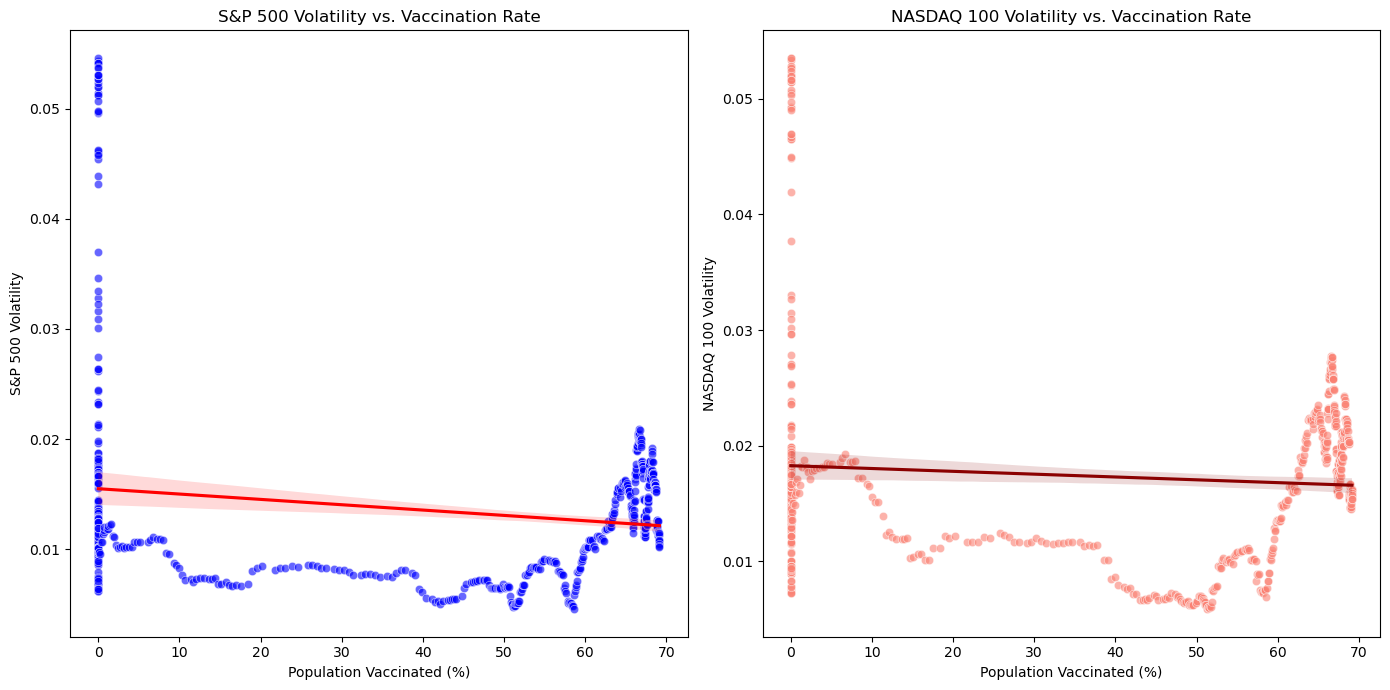

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv(r"C:\Users\sales\Downloads\OxCGRT_latest.csv")
covid_data = data[data['CountryName'] == 'United States']
covid_data.loc[:, 'Date'] = pd.to_datetime(covid_data['Date'], format='%Y%m%d')

stock_data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')
stock_data['S&P_500_Price'] = stock_data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
stock_data['Nasdaq_100_Price'] = stock_data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)

stock_data['S&P_500_Returns'] = stock_data['S&P_500_Price'].pct_change()
stock_data['Nasdaq_100_Returns'] = stock_data['Nasdaq_100_Price'].pct_change()

window_size = 30  
stock_data['S&P_500_Volatility'] = stock_data['S&P_500_Returns'].rolling(window=window_size).std()
stock_data['Nasdaq_100_Volatility'] = stock_data['Nasdaq_100_Returns'].rolling(window=window_size).std()

merged_data = pd.merge(stock_data, covid_data, on='Date', how='inner')
merged_data = merged_data.groupby('Date').agg({
    'S&P_500_Volatility': 'mean',
    'Nasdaq_100_Volatility': 'mean',
    'PopulationVaccinated': 'mean',
    'StringencyIndex_Average': 'mean'
}).reset_index()

X = merged_data['PopulationVaccinated']
X = sm.add_constant(X)  # adding a constant for the intercept
y_sp500 = merged_data['S&P_500_Volatility']
y_nasdaq = merged_data['Nasdaq_100_Volatility']

model_sp500 = sm.OLS(y_sp500, X, missing='drop').fit()
model_nasdaq = sm.OLS(y_nasdaq, X, missing='drop').fit()

def print_stats(model, name):
    print(f"Results for {name}:")
    print("Coefficient Estimates:", model.params)
    print("Standard Errors:", model.bse)
    print("T-values:", model.tvalues)
    print("P-values:", model.pvalues)
    print("R-squared:", model.rsquared)
    print("----------------------------------------------------\n")

print_stats(model_sp500, "S&P 500 Volatility")
print_stats(model_nasdaq, "NASDAQ 100 Volatility")

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PopulationVaccinated', y='S&P_500_Volatility', data=merged_data, alpha=0.6, color='blue')
sns.regplot(x='PopulationVaccinated', y='S&P_500_Volatility', data=merged_data, scatter=False, color='red')
plt.title('S&P 500 Volatility vs. Vaccination Rate')
plt.xlabel('Population Vaccinated (%)')
plt.ylabel('S&P 500 Volatility')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PopulationVaccinated', y='Nasdaq_100_Volatility', data=merged_data, alpha=0.6, color='salmon')
sns.regplot(x='PopulationVaccinated', y='Nasdaq_100_Volatility', data=merged_data, scatter=False, color='darkred')
plt.title('NASDAQ 100 Volatility vs. Vaccination Rate')
plt.xlabel('Population Vaccinated (%)')
plt.ylabel('NASDAQ 100 Volatility')

plt.tight_layout()
plt.show()

S&P 500 Regression Results
Coefficient Estimates: const                   3365.034442
PopulationVaccinated      13.887217
dtype: float64
Standard Errors: const                   20.513725
PopulationVaccinated     0.439104
dtype: float64
T-values: const                   164.038198
PopulationVaccinated     31.626264
dtype: float64
P-values: const                    0.000000e+00
PopulationVaccinated    2.001853e-139
dtype: float64
R-squared: 0.5754278756667898


NASDAQ 100 Regression Results
Coefficient Estimates: const                   10974.989046
PopulationVaccinated       42.563914
dtype: float64
Standard Errors: const                   101.831665
PopulationVaccinated      2.179745
dtype: float64
T-values: const                   107.775798
PopulationVaccinated     19.527018
dtype: float64
P-values: const                   0.000000e+00
PopulationVaccinated    8.940837e-69
dtype: float64
R-squared: 0.34066194833465524




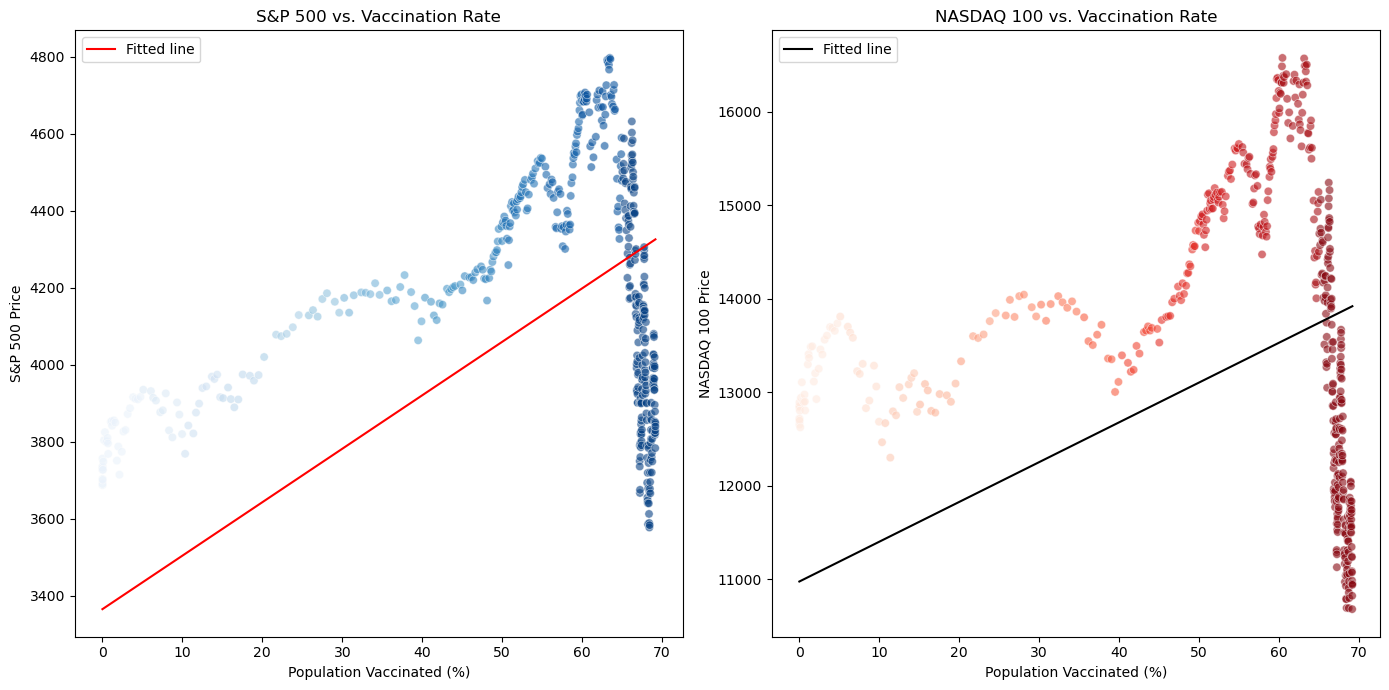

In [10]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\sales\Downloads\OxCGRT_latest.csv")
covid_data = data[data['CountryName'] == 'United States']
covid_data.loc[:, 'Date'] = pd.to_datetime(covid_data['Date'], format='%Y%m%d')

stock_data = pd.read_csv(r"C:\Users\sales\Downloads\Stock Market Dataset.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')
stock_data['S&P_500_Price'] = stock_data['S&P_500_Price'].replace(',', '', regex=True).astype(float)
stock_data['Nasdaq_100_Price'] = stock_data['Nasdaq_100_Price'].replace(',', '', regex=True).astype(float)

merged_data1 = pd.merge(stock_data, covid_data, on='Date', how='inner')
merged_data1 = merged_data1.groupby('Date').agg({
    'S&P_500_Price': 'mean',
    'Nasdaq_100_Price': 'mean',
    'PopulationVaccinated': 'mean'
}).reset_index()

max_vacc_rate = merged_data1['PopulationVaccinated'].max()
bin_size = 5
bin_labels = [f"{i}%-{i+bin_size-1}%" for i in range(0, int(max_vacc_rate), bin_size)]
bin_edges = range(0, int(max_vacc_rate) + bin_size, bin_size)
merged_data1['Binned_VaccinationRate'] = pd.cut(merged_data1['PopulationVaccinated'], bins=bin_edges, labels=bin_labels)

X = merged_data1[['PopulationVaccinated']]
y_snp = merged_data1['S&P_500_Price']
y_nasdaq = merged_data1['Nasdaq_100_Price']
X = sm.add_constant(X)

model_snp = sm.OLS(y_snp, X).fit()
model_nasdaq = sm.OLS(y_nasdaq, X).fit()

def print_model_stats(model, name):
    print(f"{name} Regression Results")
    print("Coefficient Estimates:", model.params)
    print("Standard Errors:", model.bse)
    print("T-values:", model.tvalues)
    print("P-values:", model.pvalues)
    print("R-squared:", model.rsquared)
    print("\n")

print_model_stats(model_snp, "S&P 500")
print_model_stats(model_nasdaq, "NASDAQ 100")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PopulationVaccinated', y='S&P_500_Price', hue='Binned_VaccinationRate', palette='Blues', data=merged_data1, alpha=0.6, legend=None)
plt.plot(merged_data1['PopulationVaccinated'], model_snp.predict(X), 'r', label='Fitted line')
plt.title('S&P 500 vs. Vaccination Rate')
plt.xlabel('Population Vaccinated (%)')
plt.ylabel('S&P 500 Price')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='PopulationVaccinated', y='Nasdaq_100_Price', hue='Binned_VaccinationRate', palette='Reds', data=merged_data1, alpha=0.6, legend=None)
plt.plot(merged_data1['PopulationVaccinated'], model_nasdaq.predict(X), 'k', label='Fitted line')
plt.title('NASDAQ 100 vs. Vaccination Rate')
plt.xlabel('Population Vaccinated (%)')
plt.ylabel('NASDAQ 100 Price')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
merged_data1

,Date,S&P_500_Price,Nasdaq_100_Price,PopulationVaccinated,Binned_VaccinationRate
0,2020-01-02,3257.85,8872.22,0.00,NaN
1,2020-01-03,3234.85,8793.90,0.00,NaN
2,2020-01-06,3246.28,8848.51,0.00,NaN
3,2020-01-07,3237.18,8846.45,0.00,NaN
4,2020-01-08,3253.05,8912.37,0.00,NaN
...,...,...,...,...,...
735,2022-12-23,3844.82,10985.45,69.11,65%-69%
736,2022-12-27,3829.25,10822.51,69.13,65%-69%
737,2022-12-28,3783.22,10679.34,69.13,65%-69%
738,2022-12-29,3849.28,10951.05,69.14,65%-69%


In [12]:
features = merged_data1.iloc[:, 1:3]  
labels = merged_data1.iloc[:, 3]   
print(features)
print(labels)

     S&P_500_Price  Nasdaq_100_Price
0          3257.85           8872.22
1          3234.85           8793.90
2          3246.28           8848.51
3          3237.18           8846.45
4          3253.05           8912.37
..             ...               ...
735        3844.82          10985.45
736        3829.25          10822.51
737        3783.22          10679.34
738        3849.28          10951.05
739        3839.50          10939.76

[740 rows x 2 columns]
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
735    69.11
736    69.13
737    69.13
738    69.14
739    69.15
Name: PopulationVaccinated, Length: 740, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

features = merged_data1.iloc[:, 1:3]  
labels = merged_data1.iloc[:, 3]      

# Split the data into training and testing sets %80/%20
X_train, X_remaining, y_train, y_remaining = train_test_split(features, labels, test_size=0.2, random_state=42)
# %10/%10
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

# Initialize and train the KNN model with n_neighbors=5
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 47.01


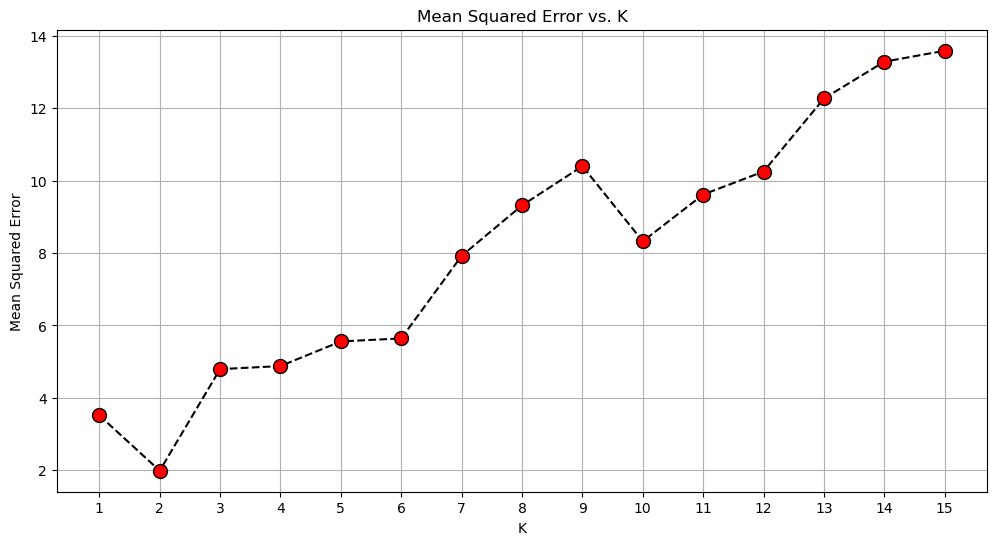

In [184]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

K_range = np.arange(1, 16)
mse_list = []

for k in K_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_val) 
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)

plt.figure(figsize=(12, 6))
plt.plot(K_range, mse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error vs. K')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.xticks(K_range)
plt.grid()
plt.show()

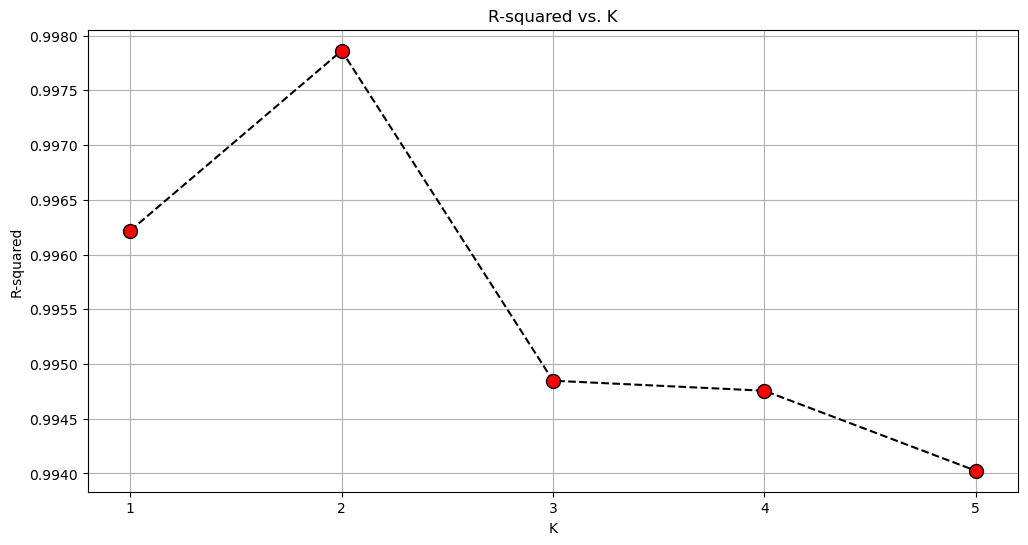

In [182]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

K_range = np.arange(1, 6)
r2_list = []  

for k in K_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_val) 
    r_squared = r2_score(y_val, y_pred)  
    r2_list.append(r_squared)  

plt.figure(figsize=(12, 6))
plt.plot(K_range, r2_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R-squared vs. K')
plt.xlabel('K')
plt.ylabel('R-squared')
plt.xticks(K_range)
plt.grid()
plt.show()

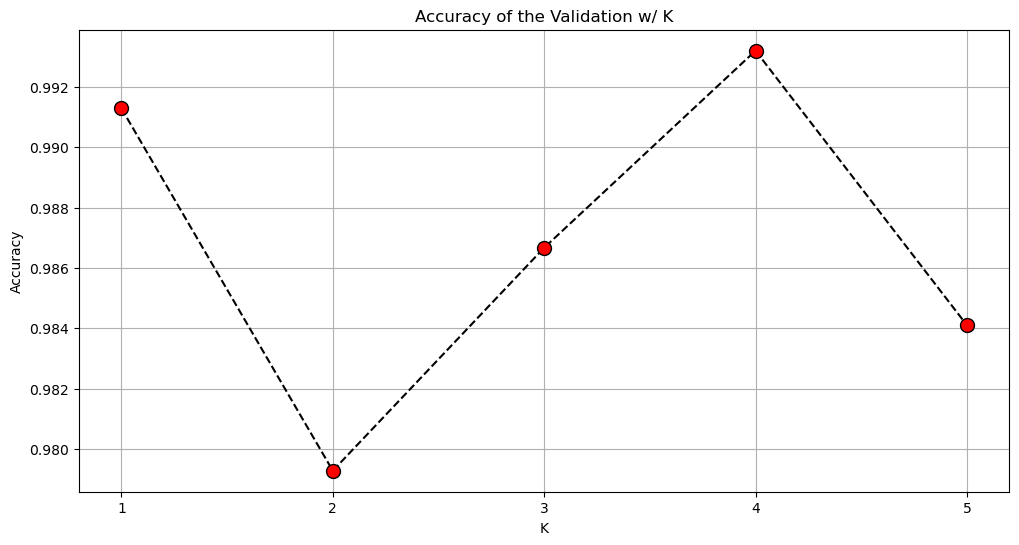

In [176]:
from sklearn.model_selection import cross_val_score

K_range = np.arange(1, 6)

for k in K_range:
    knn_accuracies = cross_val_score(knn, X_train, y_train, cv=5)
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_val) 

plt.figure(figsize=(12, 6))
plt.plot(K_range, knn_accuracies, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

In [170]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  

dt_predictions = dt.predict(X_test)  

dt_mse = mean_squared_error(y_test, dt_predictions)

print(f'Decision Tree Mean Squared Error: {dt_mse}')

Decision Tree Mean Squared Error: 86.1105445945946


In [171]:
from sklearn import tree

model = tree.DecisionTreeRegressor() 
model.fit(X_train, y_train)

DecisionTreeRegressor()

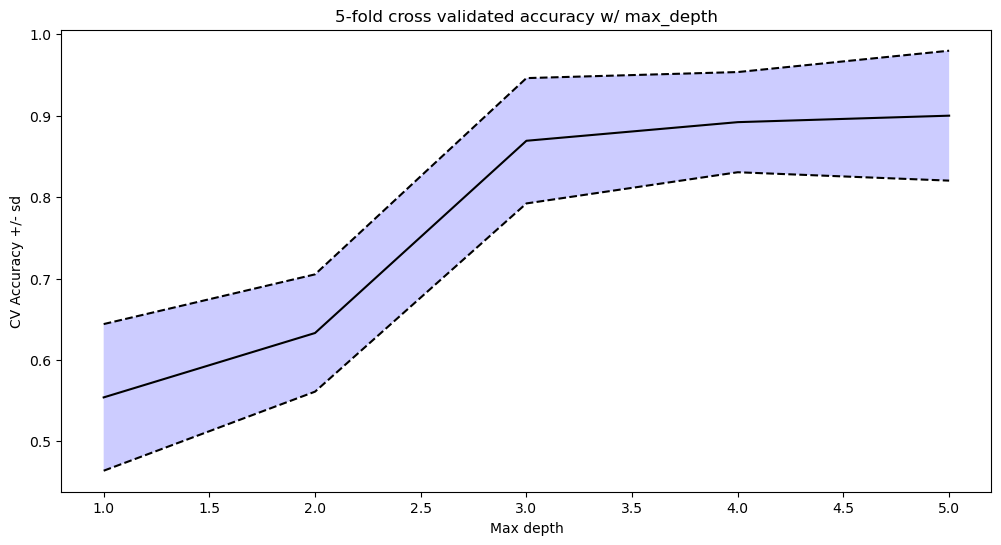

In [179]:
from sklearn.model_selection import cross_val_score

model = tree.DecisionTreeRegressor() 

# Find the best parameter for max_depth using 5-fold CV
accuracy_list = []
accuracy_SD_list = []

for depth in range (1, 6):
  model = tree.DecisionTreeRegressor(max_depth=depth)
  accuracies_CV = cross_val_score(model, X_train, y_train, cv=5)
  accuracy_list.append(accuracies_CV.mean())
  accuracy_SD_list.append(accuracies_CV.std())
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1,6), accuracy_list, color='black', linestyle='solid')
plt.plot(range(1, 6), np.array(accuracy_list) + np.array(accuracy_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 6), np.array(accuracy_list) - np.array(accuracy_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 6), np.array(accuracy_list) + np.array(accuracy_SD_list),
                 np.array(accuracy_list) - np.array(accuracy_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('5-fold cross validated accuracy w/ max_depth')
plt.xlabel('Max depth')
plt.ylabel('CV Accuracy +/- sd')
plt.show()

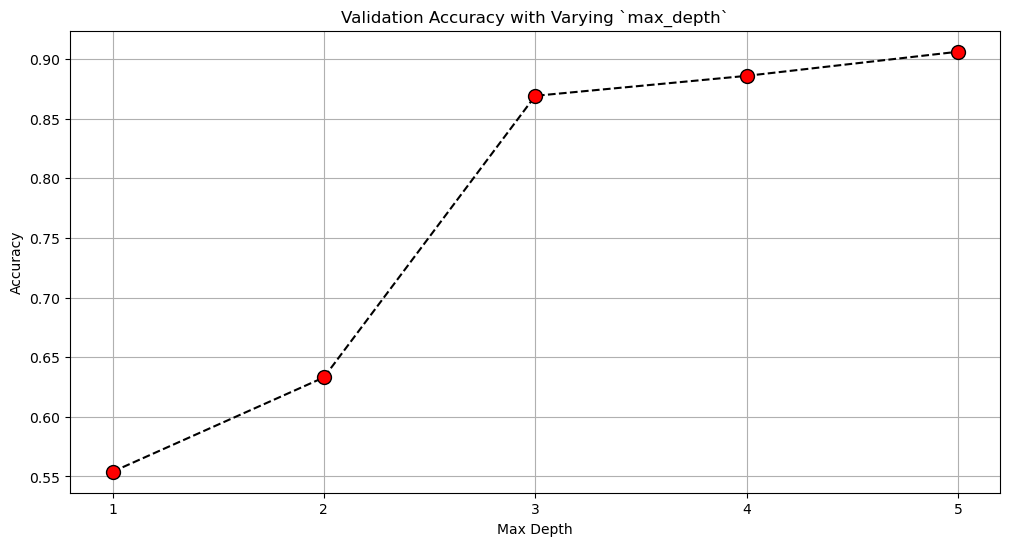

In [178]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

max_depth_range = np.arange(1, 6)

for depth in max_depth_range:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_val)
    
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, accuracy_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Validation Accuracy with Varying `max_depth`')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range)
plt.grid()
plt.show()

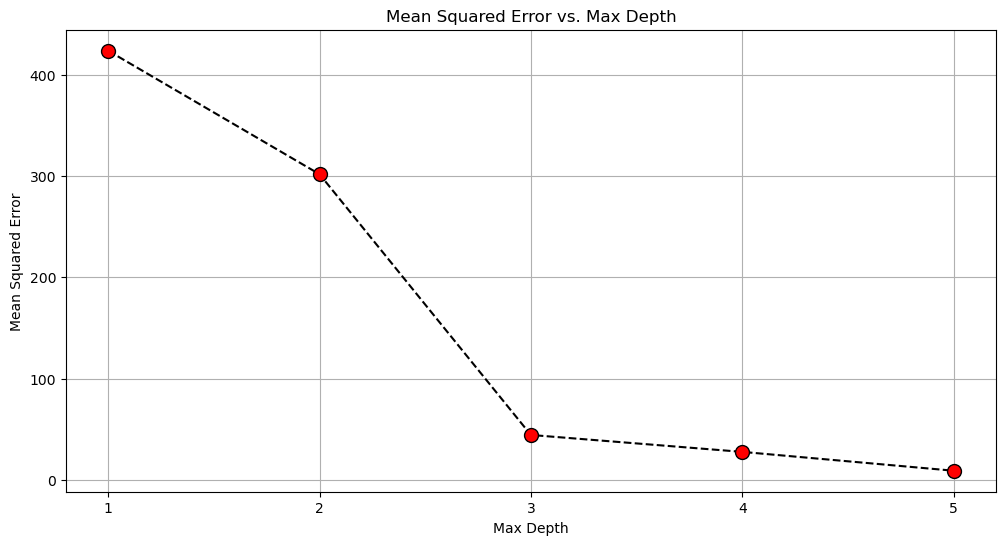

In [181]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

max_depth_range = np.arange(1, 6)
mse_list = []

for depth in max_depth_range:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)  
    dt_pred = dt.predict(X_val)
    mse = mean_squared_error(y_val, dt_pred)
    mse_list.append(mse)

plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, mse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depth_range)
plt.grid()
plt.show()

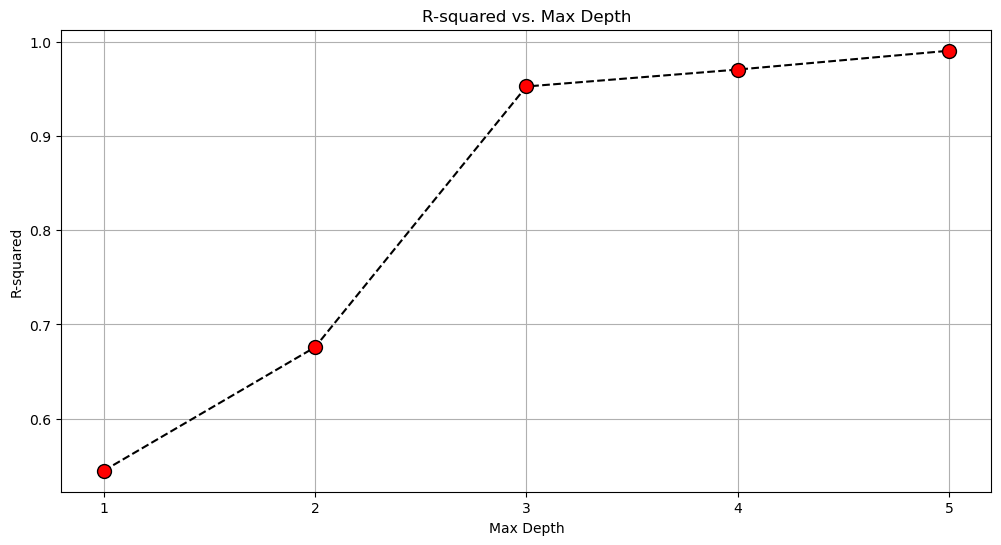

In [154]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

max_depth_range = np.arange(1, 6)
r2_list = []  

for depth in max_depth_range:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)  
    dt_pred = dt.predict(X_val)
    r_squared = r2_score(y_val, dt_pred)  
    r2_list.append(r_squared)  

plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, r2_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R-squared vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.xticks(max_depth_range)
plt.grid()
plt.show()

In [155]:
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

knn_test_predictions = knn.predict(X_test)
dt_test_predictions = dt.predict(X_test)

knn_test_mse = mean_squared_error(y_test, knn_test_predictions)
dt_test_mse = mean_squared_error(y_test, dt_test_predictions)

knn_test_r2 = r2_score(y_test, knn_test_predictions)
dt_test_r2 = r2_score(y_test, dt_test_predictions)

print("KNN Test MSE:", knn_test_mse)
print("DT Test MSE:", dt_test_mse)
print("KNN Test R2:", knn_test_r2)
print("DT Test R2:", dt_test_r2)

KNN Test MSE: 52.66282514114115
DT Test MSE: 97.48467768708704
KNN Test R2: 0.937695501804364
DT Test R2: 0.8846675257398532


In [156]:
# Using Negative Mean Squared Error for comparison because cross_val_score returns negative values for loss functions
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

knn_r2_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
dt_r2_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')

print("KNN Average MSE:", np.mean(-knn_scores))
print("DT Average MSE:", np.mean(-dt_scores))
print("KNN Average R2:", np.mean(knn_r2_scores))
print("DT Average R2:", np.mean(dt_r2_scores))

KNN Average MSE: 32.17252710550254
DT Average MSE: 76.92546586141245
KNN Average R2: 0.964518779377529
DT Average R2: 0.914652416013159
